In [70]:
import komm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid": True, "font.size": 14})

# M-PSK

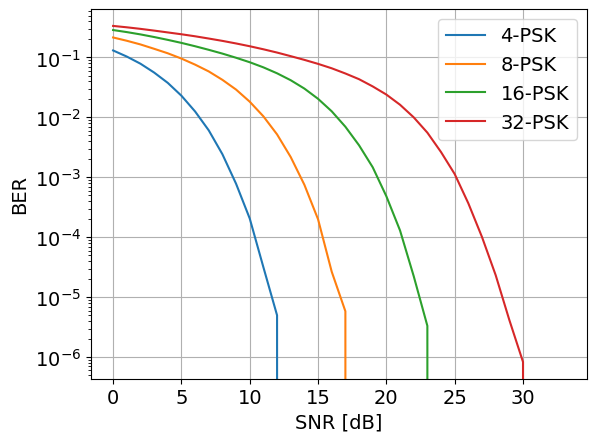

In [77]:
data = np.random.randint(0, 1, 2 * 3 * 4 * 5 * 10000)

fig, ax = plt.subplots()

for M in [4, 8, 16, 32]:
    psk_modulation = komm.PSKModulation(M)

    psk_symbols = psk_modulation.modulate(data)

    psk_ber = []
    for snr in np.arange(1, 35):
        snr_linear = 10 ** (snr / 10)
        awg_channel = komm.AWGNChannel(snr=snr_linear, signal_power=1)

        psk_noisy = awg_channel(psk_symbols)

        psk_demodulated = psk_modulation.demodulate(psk_noisy)

        psk_ber.append(np.bitwise_xor(psk_demodulated, data).sum() / len(data))

    ax.semilogy(psk_ber, label=f"{M}-PSK")

ax.set_xlabel("SNR [dB]")
ax.set_ylabel("BER")

ax.legend()

plt.show()

# M-QAM

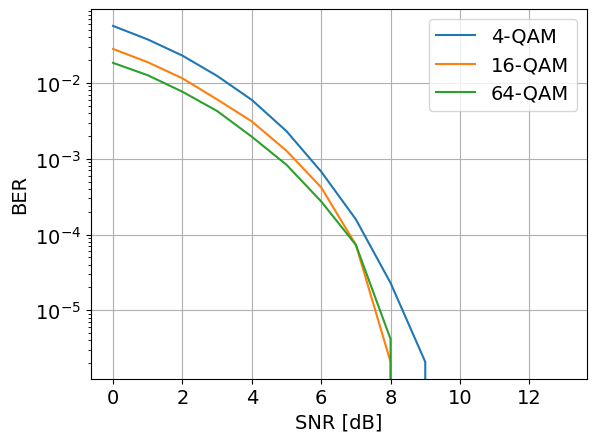

In [76]:
data = np.random.randint(0, 1, 2 * 4 * 6 * 10000)

fig, ax = plt.subplots()

for M in [4, 16, 64]:
    qam_modulation = komm.QAModulation(M)

    qam_symbols = qam_modulation.modulate(data)

    qam_ber = []
    for snr in np.arange(1, 15):
        snr_linear = 10 ** (snr / 10)
        awg_channel = komm.AWGNChannel(snr=snr_linear, signal_power=1)

        qam_noisy = awg_channel(qam_symbols)

        qam_demodulated = qam_modulation.demodulate(qam_noisy)

        qam_ber.append(np.bitwise_xor(qam_demodulated, data).sum() / len(data))

    ax.semilogy(qam_ber, label=f"{M}-QAM")

ax.set_xlabel("SNR [dB]")
ax.set_ylabel("BER")

ax.legend()

plt.show()

# PSK vs QAM

len:480000, b/s:2 0
len:480000, b/s:4 0
len:480000, b/s:6 0


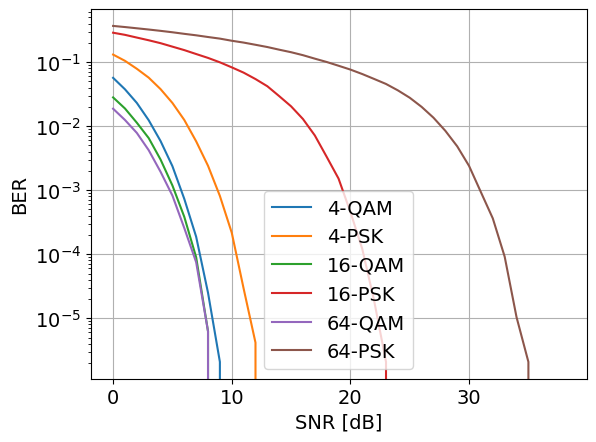

In [73]:
data = np.random.randint(0, 1, 2 * 4 * 6 * 10000)

fig, ax = plt.subplots()

for M in [4, 16, 64]:
    qam_modulation = komm.QAModulation(M)
    psk_modulation = komm.PSKModulation(M)

    print(
        f"len:{len(data)}, b/s:{qam_modulation._bits_per_symbol}",
        len(data) % qam_modulation._bits_per_symbol,
    )

    qam_symbols = qam_modulation.modulate(data)
    psk_symbols = psk_modulation.modulate(data)

    qam_ber = []
    psk_ber = []
    for snr in np.arange(1, 40):
        snr_linear = 10 ** (snr / 10)
        awg_channel = komm.AWGNChannel(snr=snr_linear, signal_power=1)

        qam_noisy = awg_channel(qam_symbols)
        psk_noisy = awg_channel(psk_symbols)

        qam_demodulated = qam_modulation.demodulate(qam_noisy)
        psk_demodulated = psk_modulation.demodulate(psk_noisy)

        qam_ber.append(np.bitwise_xor(qam_demodulated, data).sum() / len(data))
        psk_ber.append(np.bitwise_xor(psk_demodulated, data).sum() / len(data))

    ax.semilogy(qam_ber, label=f"{M}-QAM")
    ax.semilogy(psk_ber, label=f"{M}-PSK")

ax.set_xlabel("SNR [dB]")
ax.set_ylabel("BER")

ax.legend()

plt.show()